# Feature Engineering notes

# Author/Created by: Ajay Taneja

# Date: September - October 2022.

# References: 
1) MLOps Specialization - Course 2 -  Machine Learning Data Lifecycle in Production<br>
2) Breast cancer dataset on kaggle


**Feature Selection:**

Feature Selection involves picking the set of features that are most relevant to the target variable. This helps in reducing the complexity of your model a well as minimizing the resources required for training and inference. This has great effect in production models where you will be dealing with terrabytes of data or serving millions of requests.

In this notebook we will run through the different techniques in performing feature selecton on the Breast Cancer dataset. Most of the modules come from scilit-learn one of the most commonly used machine learning libraries, It features various machine learning algorithms and has built-in implementations oif many feature selection methods. 



**About the Dataset**

**The Breast Cancer Dataset:** Ref: 

1) http://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+%28diagnostic%29<br>
2) https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data<br>

Data Set Characteristics: 

1) Multivariate (or, multidimensional)<br>
2) Number of instances - 559<br>
3) Number of attributes - 32<br>
4) Associated tasks: Classification<br>



Features are computed from a digitalised image a breast mass. They describe the characterised of the cell nuclei present in the image. 

Attribute information

1) ID Number<br>
2) Diagnosis<br>

Ten real valued features are computed for each cell nucleus:

1) radius (mean of distances from centre to points on the perimeter)<br>
2) texture (standard deviation of grey-scale values)<br>
3) perimeter<br>
4) area<br>
5) Smoothness<br>
6) Compactness<br>
7) Concavity<br>
8) Concave points<br>
9) Symmetry<br>
10) Fractal dimension<br>


The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image,resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.


In [430]:
# for data procesing and manipulation
import pandas as pd
import numpy as np

#scikit learn libraries 
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE, SelectKBest, SelectFromModel, chi2, f_classif
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score,f1_score
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler, MinMaxScaler

#librries for visualisation
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt


In [431]:
#Load the dataset
#csv has been downloaded
df = pd.read_csv("breast_cancer_data.csv")

#print types

print(df.dtypes)

df.describe(include='all')


id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

id diagnosis  radius_mean  texture_mean  perimeter_mean  \
count   5.690000e+02       569   569.000000    569.000000      569.000000   
unique           NaN         2          NaN           NaN             NaN   
top              NaN         B          NaN           NaN             NaN   
freq             NaN       357          NaN           NaN             NaN   
mean    3.037183e+07       NaN    14.127292     19.289649       91.969033   
std     1.250206e+08       NaN     3.524049      4.301036       24.298981   
min     8.670000e+03       NaN     6.981000      9.710000       43.790000   
25%     8.692180e+05       NaN    11.700000     16.170000       75.170000   
50%     9.060240e+05       NaN    13.370000     18.840000       86.240000   
75%     8.813129e+06       NaN    15.780000     21.800000      104.100000   
max     9.113205e+08       NaN    28.110000     39.280000      188.500000   

          area_mean  smoothness_mean  compactness_mean  concavity_mean  \
count    569.000000       569.000000        569.000000      569.000000   
unique          NaN              NaN               NaN             NaN   
top             NaN              NaN               NaN             NaN   
freq            NaN              NaN               NaN             NaN   
mean     654.889104         0.096360          0.104341        0.088799   
std      351.914129         0.014064          0.052813        0.079720   
min      143.500000         0.052630          0.019380        0.000000   
25%      420.300000         0.086370          0.064920        0.029560   
50%      551.100000         0.095870          0.092630        0.061540   
75%      782.700000         0.105300          0.130400        0.130700   
max     2501.000000         0.163400          0.345400        0.426800   

        concave points_mean  ...  texture_worst  perimeter_worst   area_worst  \
count            569.000000  ...     569.000000       569.000000   569.000000   
unique                  NaN  ...            NaN              NaN          NaN   
top                     NaN  ...            NaN              NaN          NaN   
freq                    NaN  ...            NaN              NaN          NaN   
mean               0.048919  ...      25.677223       107.261213   880.583128   
std                0.038803  ...       6.146258        33.602542   569.356993   
min                0.000000  ...      12.020000        50.410000   185.200000   
25%                0.020310  ...      21.080000        84.110000   515.300000   
50%                0.033500  ...      25.410000        97.660000   686.500000   
75%                0.074000  ...      29.720000       125.400000  1084.000000   
max                0.201200  ...      49.540000       251.200000  4254.000000   

        smoothness_worst  compactness_worst  concavity_worst  \
count         569.000000         569.000000       569.000000   
unique               NaN                NaN              NaN   
top                  NaN                NaN              NaN   
freq                 NaN                NaN              NaN   
mean            0.132369           0.254265         0.272188   
std             0.022832           0.157336         0.208624   
min             0.071170           0.027290         0.000000   
25%             0.116600           0.147200         0.114500   
50%             0.131300           0.211900         0.226700   
75%             0.146000           0.339100         0.382900   
max             0.222600           1.058000         1.252000   

        concave points_worst  symmetry_worst  fractal_dimension_worst  \
count             569.000000      569.000000               569.000000   
unique                   NaN             NaN                      NaN   
top                      NaN             NaN                      NaN   
freq                     NaN             NaN                      NaN   
mean                0.114606        0.290076                 0.083946   
std                 0.06

In [432]:
#Preview the dataset

df.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33           184.60      2019.0            0.1622   
1  ...          23.41           158.80      1956.0            0.1238   
2  ...          25.53           152.50      1709.0            0.1444   
3  ...          26.50            98.87       567.7            0.2098   
4  ...          16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  

[5 rows x 33 columns]

**Remove unwanted features**

1) We should remove the features that we do not need. The column Unnamed:32 has NaN values for all rows.<br>
2) As well as the the "id" column is an arbitrary number assigned to the patietnts presumably tracking the id of the patients in the hospital. In the feature engineering exercise, we do not need the id column and hence it can also eb removed from the dataset aloing with teh column Unnamed: 32<br>

In [433]:
#Let us check if there are NaN values in any of the columns. It can be noticed that only the Unnamed:32 column 
#has several NaN which we are going to drop anyways.

df.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [434]:
#Let us now remove the Unnamed:32 column and the id column from the data-frame

columns_to_remove = ['Unnamed: 32', 'id']
df.drop(columns_to_remove, axis=1, inplace=True)

#Check that the columns are removed
df.head()

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0         M        17.99         10.38          122.80     1001.0   
1         M        20.57         17.77          132.90     1326.0   
2         M        19.69         21.25          130.00     1203.0   
3         M        11.42         20.38           77.58      386.1   
4         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...         25.38          17.33           184.60   
1         0.1812  ...         24.99          23.41           158.80   
2         0.2069  ...         23.57          25.53           152.50   
3         0.2597  ...         14.91          26.50            98.87   
4         0.1809  ...         22.54          16.67           152.20   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 31 columns]

**Integer Encode Diagnosis**

The target column, "diagnosis" is enclosed as a string type categorical variable "M" for malignant and "B" for benign. We have to convert this into integer before training the model. Since theer are only two values, we use 0 for "benign" and "M" for malignant. We create a column **"diagnosis_int"** containing the integer representation.

In [435]:
#Integer encode the target variable, "diagnosis"

df['diagnosis_int'] = (df['diagnosis'] == 'M').astype('int')

#We can now drop the column 'diagnosis'

df.drop(['diagnosis'], axis=1, inplace=True)

In [436]:
#Let us now check the new coumn and confirm that the diagnosis column is actually dropped

df.head()

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   fractal_dimension_mean  ...  texture_worst  perimeter_worst  area_worst  \
0                 0.07871  ...          17.33           184.60      2019.0   
1                 0.05667  ...          23.41           158.80      1956.0   
2                 0.05999  ...          25.53           152.50      1709.0   
3                 0.09744  ...          26.50            98.87       567.7   
4                 0.05883  ...          16.67           152.20      1575.0   

   smoothness_worst  compactness_worst  concavity_worst  concave points_worst  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   symmetry_worst  fractal_dimension_worst  diagnosis_int  
0          0.4601                  0.11890              1  
1          0.2750                  0.08902              1  
2          0.3613                  0.08758              1  
3          0.6638                  0.17300              1  
4          0.2364                  0.07678              1  

[5 rows x 31 columns]

**Model Performance**

We are now going to compare the performance of each feature selection technique using evaluaton metrics: accuracy, roc, precision, recall and f1 score. 

Therefre, we need to firstly split the dataset into feature vector X and taget vector (diagnosis) to fit a RandomForest classifier


In [437]:
X = df.drop("diagnosis_int", axis=1, inplace=False)
Y = df["diagnosis_int"]

In [438]:
X.head()


radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   fractal_dimension_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0                 0.07871  ...         25.38          17.33           184.60   
1                 0.05667  ...         24.99          23.41           158.80   
2                 0.05999  ...         23.57          25.53           152.50   
3                 0.09744  ...         14.91          26.50            98.87   
4                 0.05883  ...         22.54          16.67           152.20   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 30 columns]

In [439]:
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: diagnosis_int, dtype: int32

**Note:**

We will be comparing the model performance with each feature selection technique. We will be using the RandomForestClassifier as the model and the baseline is going to be the RandomForestClassifier comprising of all the features.

Let us define some helper functions


**Helper Functions**

We will be defining the following helper functions:

1) Function for fitting a model: fit_model <br>
2) Function to evaluate the metrics: calculate_metrics <br>
3) Function that trains and gets the metrics - this function will call 1) and 2) and before that the function to split into train and test set<br>
4) Function to construct a dataframe and display the metrics<br>

**Let's start defining the helper functions**

In [440]:
#Function to fir the model- we use the RandomForestClassifier as the model

#define the model to use

#this is the helper function 1)

def fit_model(X, Y):
    

    #define the model to use
    model = RandomForestClassifier(criterion='entropy', random_state=47)

    #Train the model
    model.fit(X, Y)
    
    #return the trained model!
    
    return model

In [441]:
#Now the second helper function
# this is a function to evaluate the metrics on the test set

def calculation_metrics(model, X_test_scaled, Y_test):
    
    #Get the model predictions
    
    y_predict_r = model.predict(X_test_scaled)
    
    #Calculate the evaluation metrics for assessing the performance of the model
    
    roc = roc_auc_score(Y_test, y_predict_r)
    acc = accuracy_score(Y_test, y_predict_r)
    prec = precision_score(Y_test, y_predict_r)
    rec = recall_score(Y_test, y_predict_r)
    f1 = f1_score(Y_test, y_predict_r)
    
    return acc, roc, prec, rec, f1
    
    

In [442]:
#This is the third helper function
#Here we train and get the metrics

def train_and_get_metrics(X, Y):
    
    # Split into train and test sets
    
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify=Y, random_state = 123)
    
    #All of the features of the dataset are float values. You normalizze the features of the train 
    #and test dataset here
    scaler = StandardScaler().fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    #Now, call the fit model to train the model on  the normalized features and the diagnosis values
    
    model = fit_model(X_train_scaled, Y_train)
    
    #Make predictions on the test set and get the evaluation matrices
    
    roc, acc, prec, rec, f1 = calculation_metrics(model, X_test_scaled, Y_test)
    return roc, acc, prec, rec, f1
    

In [443]:
#This is the fourth helper function wherein we train the model and get the metrics

def evaluate_model_on_features(X, Y):
    
    #Train the model, predict values and get metrics
    
    acc, roc, prec, rec, f1 = train_and_get_metrics(X, Y)
    
    #Construct a dataframe to display the metrics
    
    display_df = pd.DataFrame([[acc, roc, prec, rec, f1, X.shape[1]]], columns = ["Accuracy", "ROC", "Precision", "Recall", "F1 score", 'Feature_Count'])
    
    return display_df

**We're done with helper functions**

**Next, firstly let us evaluate the metrics with all features!**

In [444]:
#Calculate the evaluation metrics with all features

all_features_eval_df = evaluate_model_on_features(X, Y)
all_features_eval_df.index = ['All features']

#Initialize the results dataframe

results = all_features_eval_df

#Check the metrics
results.head()

Accuracy       ROC  Precision   Recall  F1 score  Feature_Count
All features  0.964912  0.967262   0.931818  0.97619  0.953488             30

**Correlation Matrix**

**It is a good idea at this point to calculate and visualize the correlation matrix of a data frame to see which features have high correlation. This can be done by just a few lines of code as shown below. The pandas corr() method computes the Pearson correlation by default and you will plot it with Matplot pyplot and seaborn. The dark blue boxes show features with high correlation while white ones show negative correlation. The diagonals will have one because the feature is mapped on itself.** 

**It should be noted that the target variable is also a part of the data frame. The corr() method does not know which variable is dependent (target) or independent (features) variables. The correlation of each  variable (including) target is computed with all the variables resulting in a corrrelation matrix.

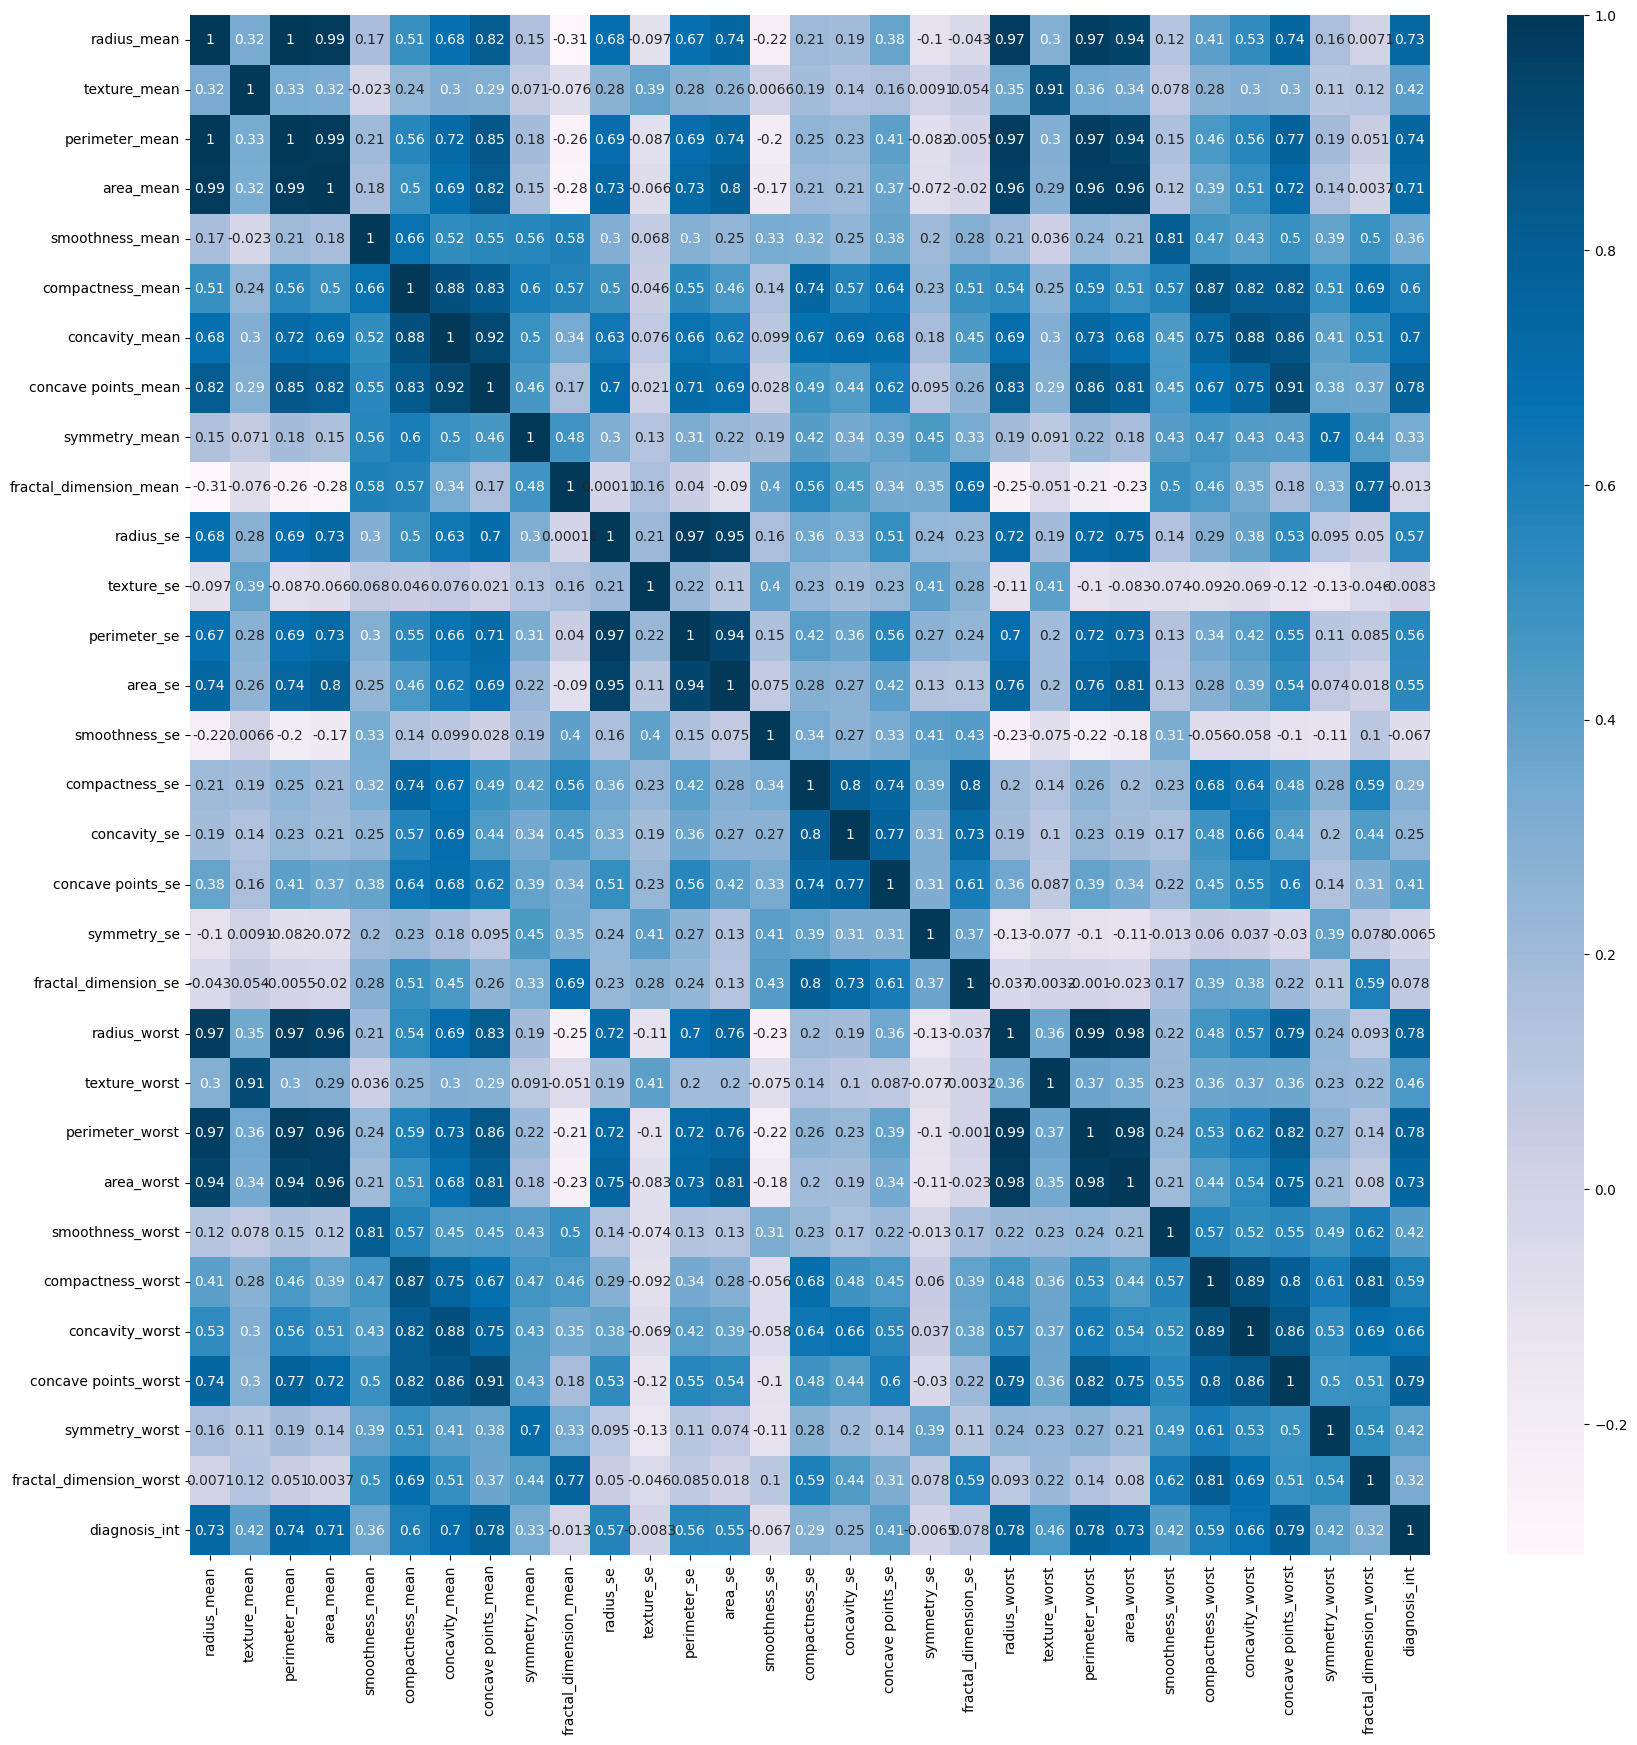

In [445]:
#Set the figure size

plt.figure(figsize=(20,20))

#Calculate the correlation matrix

cor = df.corr()

#Plot the correlation matrix
sns.heatmap(cor, annot=True, cmap=plt.cm.PuBu) #See screenshot below for the coloutr map denoting PuBu
plt.show()

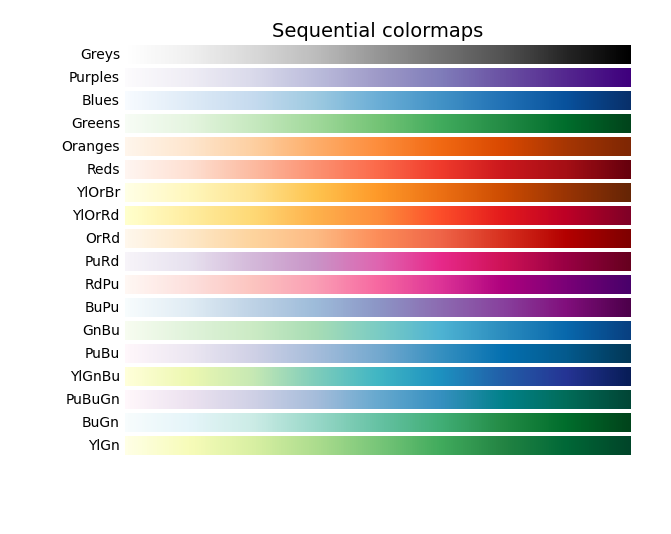

**Filter Methods**

In Filter methods, we start with all the features and select the best subset that we are going to give to the machine learning model. In these methods, we get a correlation matrix that tells us how the features are corelated with one another and the target variable. Some of the correlations commonly used are Pearson’s correlation, Kendall Tau Rank correlation and Spearman corelation.

Thus, this type of feature selection uses statistical measures to rank a given set of features. **Important to note is that it does the ranking irrespective of the model you will be training on.**

When using these, it is important to note the types of features and he target variable you have. Some examples being:

1) Pearson's correlation (numerical features-numerical target) - can also be used where a categorical has been translated into numerical encoding <br> 
2) ANOVA f-test (numerical features-categorical target) <br>
3) Chi-square (categorical features-categorical target) <br>




**Correlation with the target variable**

1) We will first remove the features which are not correlated with teh target variable beyond a certain target <br>
2) Then, we will remove those features which are highly crrelated with one another<br>

Since we have numerical features and our target - although categorical has been intefer encode (0/1) we 
can use Pearson's correlation to compute the scores for each feature. This is categorized as supervised feature selection
because we're taking into account the relationship of each feature with the target variable.


**It should be underscored that:**<br>

Ten real valued features are computed for each cell nucleus:

1) radius (mean of distances from centre to points on the perimeter)<br>
2) texture (standard deviation of grey-scale values)<br>
3) perimeter<br>
4) area<br>
5) Smoothness<br>
6) Compactness<br>
7) Concavity<br>
8) Concave points<br>
9) Symmetry<br>
10) Fractal dimension<br>


The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image,resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

In [446]:
# Get the absolute value of the correlation

cor_target = abs(cor["diagnosis_int"])

# Select highly correlated features with the target variable 
relevant_features = cor_target[cor_target>0.2]

#collect the names of the features 

names = [index for index, value in relevant_features.iteritems()]

# Drop the target variable from the results

names.remove('diagnosis_int')

#Display the results

print(names)

['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'radius_se', 'perimeter_se', 'area_se', 'compactness_se', 'concavity_se', 'concave points_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']


C:\Users\ataneja\AppData\Local\Temp\ipykernel_16884\2352645610.py:10: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  names = [index for index, value in relevant_features.iteritems()]


In [447]:
#Evaluate the model with reduced features

strong_features_eval_df = evaluate_model_on_features(df[names], Y)
strong_features_eval_df.index = ['Strong features']

#Append to results and display

results = results.append(strong_features_eval_df)
results.head()


C:\Users\ataneja\AppData\Local\Temp\ipykernel_16884\1079823571.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(strong_features_eval_df)


Accuracy       ROC  Precision   Recall  F1 score  \
All features     0.964912  0.967262   0.931818  0.97619  0.953488   
Strong features  0.973684  0.974206   0.953488  0.97619  0.964706   

                 Feature_Count  
All features                30  
Strong features             25

**Correlation with other features**

We will now correlate features which are highly correlated with each other. This helps to remove redundant features resulting in a simpler model. 

Let's do this below.


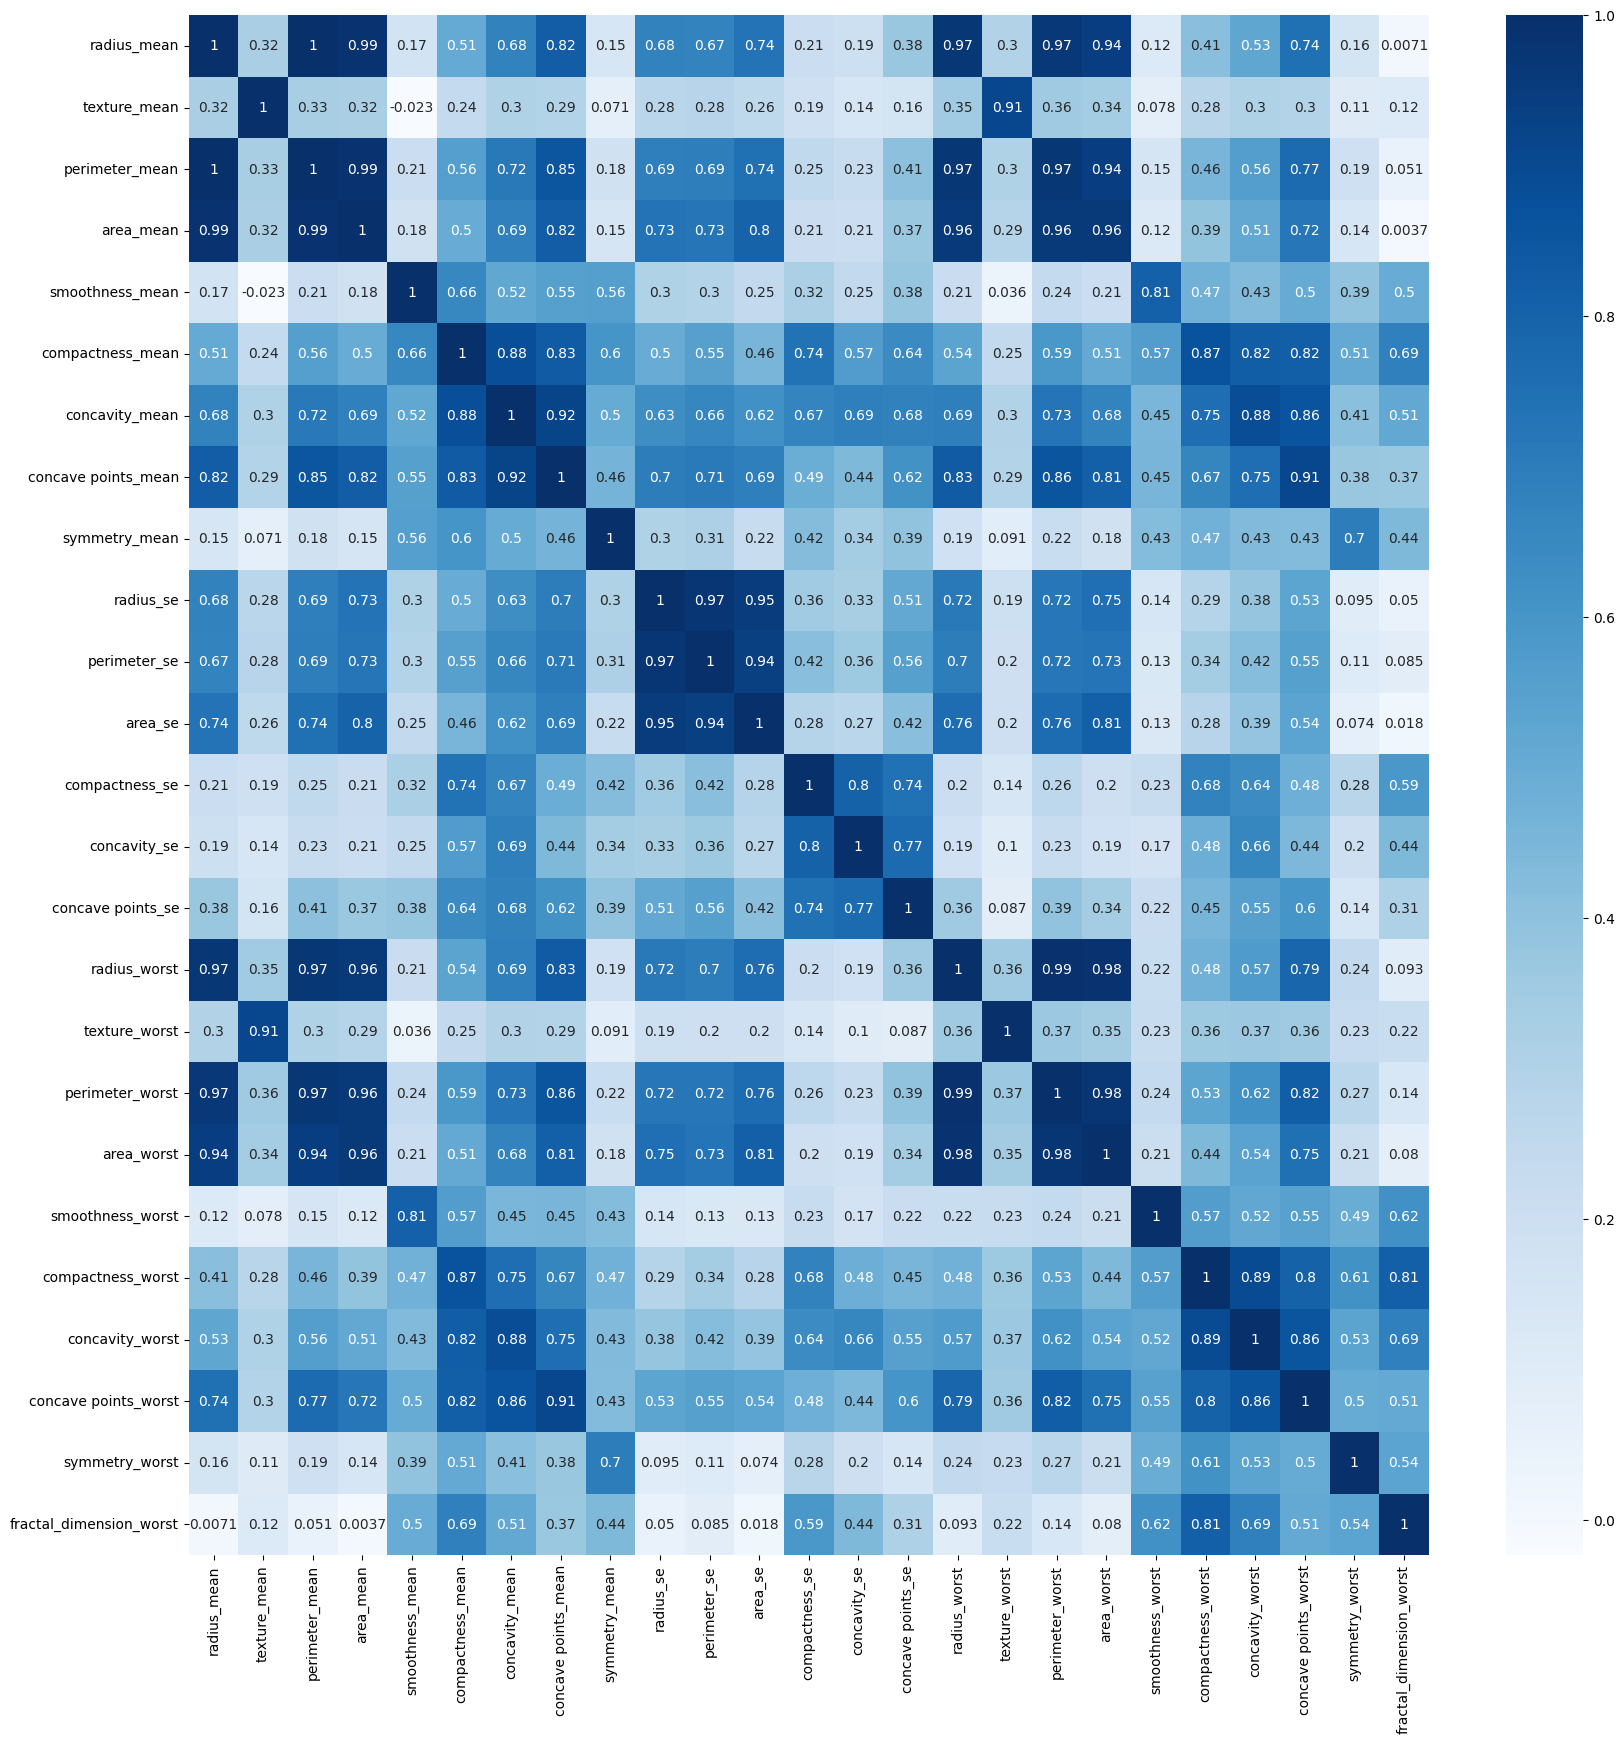

In [448]:
#Set the figure size

plt.figure(figsize=(20,20))

#Calculate the correlation matrix 
new_corr = df[names].corr()

#Visualize the correlation matrix

sns.heatmap(new_corr, annot=True, cmap=plt.cm.Blues)
plt.show()

You can see that the radius_mean is highly correlated to radius_worst, perimeter_worst and area_worst. You can retain radius_mean and eliminate rest of the features highly correlated with it.

Similarly, concavity_mean is highly correlated to concave poins_mean. Thus, we can remove concave points_mean and retain concavity_mean from the set of features

Thus, we can do as below and retain only relevant features and remove features highly correlated.

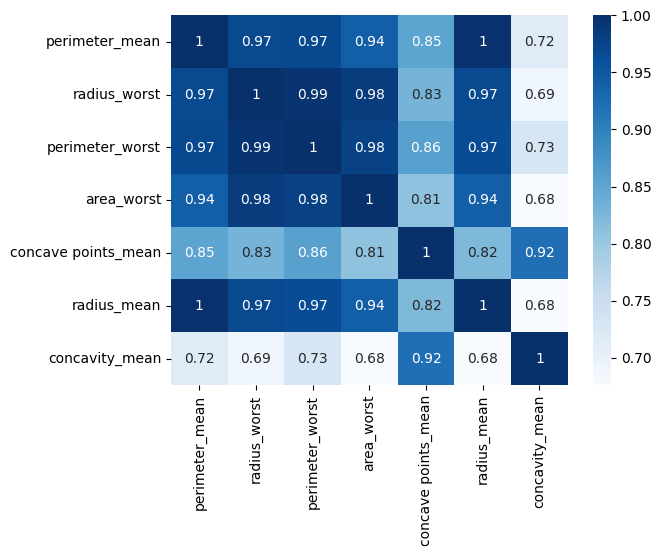

In [449]:
new_corr = df[['perimeter_mean', 'radius_worst', 'perimeter_worst', 
            'area_worst', 'concave points_mean', 'radius_mean', 'concavity_mean']]. corr()

#Visualise the correlation matrix

sns.heatmap(new_corr, annot=True, cmap=plt.cm.Blues)
plt.show()

1) Now, we will evaluate the model on the features selected based on the observations so far.<br>
2) It may be noticed that the metrics show the same value as when it was using 25 feaures. <br>
3) This indicates that you can get the same model performance even if you reduced the number of features.<br>
4) This indicates that the 4 features you removed were indeed redundant and that you needed the features only that you retained.<br>

In [450]:
#Remove the features with high correlation to one another

subset_feature_corr_names = [x for x in names if x not in ['perimeter_mean','radius_worst', 'perimeter_worst', 
                                                           'area_worst', 'concavepoints_mean']]

# Evaluate the model with new features
subset_features_eval_df = evaluate_model_on_features(df[subset_feature_corr_names], Y)
subset_features_eval_df.index = ['subset_features']
# Append to results and display
results = results.append(subset_features_eval_df)
results.head(n=10)

C:\Users\ataneja\AppData\Local\Temp\ipykernel_16884\3247022786.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(subset_features_eval_df)


Accuracy       ROC  Precision   Recall  F1 score  \
All features     0.964912  0.967262   0.931818  0.97619  0.953488   
Strong features  0.973684  0.974206   0.953488  0.97619  0.964706   
subset_features  0.973684  0.974206   0.953488  0.97619  0.964706   

                 Feature_Count  
All features                30  
Strong features             25  
subset_features             21

**Univariate Feature Selection with scikit learn**

Scikit learn offers more filters in its feature selection module [https://scikit-learn.org/stable/modules/feature_selection.html#univariate-feature-selection]. Moreover, it has convenience methods (built in) for how you would like to filter the features. 

Here we will compute the ANOVA F-values to select the top 20 features using SelectKBest()

In [451]:
#First let us define a helper function 

def univariate_selection():
    #Split into train and test sets
    
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify=Y, random_state=123)
    
    #All the feattures of the dataset are float values. You normalize all the features of the train and 
    #the test set here.
    
    ##For normalization, this means the training data will be used to estimate the minimum 
    ##and maximum observable values. This is done by calling the fit() function.
    
    scaler = StandardScaler().fit(X_train)
    
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    #USer SelectKbest to select top 20 features based on f-test
    selector = SelectKBest(f_classif, k=20)
    
    #Fit to scaled data and then transform it
    
    X_new = selector.fit_transform(X_train_scaled, Y_train)
    #Print the results
    
    feature_idx = selector.get_support()
    
    for name, included in zip(df.drop("diagnosis_int",1 ).columns, feature_idx):
        
        print("%s: %s" % (name, included))
        # Drop the target variable
    feature_names = df.drop("diagnosis_int",1 ).columns[feature_idx]
    return feature_names
    

**Let us now see what are the features selected by the Sci-Kit Learn's univariate feature selection method**

In [452]:
univariate_feature_names = univariate_selection()

radius_mean: True
texture_mean: True
perimeter_mean: True
area_mean: True
smoothness_mean: False
compactness_mean: True
concavity_mean: True
concave points_mean: True
symmetry_mean: False
fractal_dimension_mean: False
radius_se: True
texture_se: False
perimeter_se: True
area_se: True
smoothness_se: False
compactness_se: False
concavity_se: False
concave points_se: True
symmetry_se: False
fractal_dimension_se: False
radius_worst: True
texture_worst: True
perimeter_worst: True
area_worst: True
smoothness_worst: True
compactness_worst: True
concavity_worst: True
concave points_worst: True
symmetry_worst: True
fractal_dimension_worst: False


C:\Users\ataneja\AppData\Local\Temp\ipykernel_16884\348917969.py:29: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  for name, included in zip(df.drop("diagnosis_int",1 ).columns, feature_idx):
C:\Users\ataneja\AppData\Local\Temp\ipykernel_16884\348917969.py:33: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  feature_names = df.drop("diagnosis_int",1 ).columns[feature_idx]


**Let us now run the Random Forest Classifier on the 20 features selected by SelectKBest of Sci-Kit Learn's univariate features selection and calculate the model metrics**

In [453]:
univariate_eval_df = evaluate_model_on_features(df[univariate_feature_names], Y)
univariate_eval_df.index = ['F-test']
#Append to results and display
results = results.append(univariate_eval_df)
results.head(n=10)

C:\Users\ataneja\AppData\Local\Temp\ipykernel_16884\3805522595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(univariate_eval_df)


Accuracy       ROC  Precision   Recall  F1 score  \
All features     0.964912  0.967262   0.931818  0.97619  0.953488   
Strong features  0.973684  0.974206   0.953488  0.97619  0.964706   
subset_features  0.973684  0.974206   0.953488  0.97619  0.964706   
F-test           0.973684  0.974206   0.953488  0.97619  0.964706   

                 Feature_Count  
All features                30  
Strong features             25  
subset_features             21  
F-test                      20

**As it can be seen, the performance metrics are the same but only 20 features have been used.**

**Wrapper Methods:**

Wrapper mehods use a model to measure the efectiveness of a subset of features. As mentioned in my blog notes, one approach is to add or remove features sequentiall starting from single or all features respectively (forward or backward selection). 

Recursive Feature Elimination is the same as backward elimination but used feature importances score to prune the umber of features. You can also specify how many features to remove at each iteration of the recursion. Let us evaluate the model performance be selecting the features using Recursive feature selction and then put the reesults in the table (allong with: all featres, features selected using Perasons correlation (i.e. features with low correlation with target variables were removed), subset of features (where features which were highly correalted were removed and thenb select k best as above)

In [454]:
def run_rfe():
    
    #Spit the train and test
    
    X_train, X_test, Y_train, Y_test =  train_test_split(X, Y, test_size = 0.2, stratify=Y, random_state=123)
    
    #All of the dataset are float values. You normalize the all features of the train and the test dataset here
    
    scaler = StandardScaler().fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    #Define the model
    model = RandomForestClassifier(criterion='entropy', random_state=47)
    
    #Wrap the recrsiv feature selection around the model
    
    rfe = RFE(estimator=model, n_features_to_select=20)
    
    #Fit RFE
    
    rfe = rfe.fit(X_train_scaled, Y_train)
    feature_names = df.drop("diagnosis_int",1 ).columns[rfe.get_support()]
    return feature_names
    
rfe_feature_names = run_rfe()

C:\Users\ataneja\AppData\Local\Temp\ipykernel_16884\2443139138.py:23: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  feature_names = df.drop("diagnosis_int",1 ).columns[rfe.get_support()]


**Evaluate the model based on features selected by RFE**

In [455]:
# Calculate and check model metrics
rfe_eval_df = evaluate_model_on_features(df[rfe_feature_names], Y)
rfe_eval_df.index = ['RFE']
# Append to results and display
results = results.append(rfe_eval_df)
results.head(n=10)

C:\Users\ataneja\AppData\Local\Temp\ipykernel_16884\2876584717.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(rfe_eval_df)


Accuracy       ROC  Precision   Recall  F1 score  \
All features     0.964912  0.967262   0.931818  0.97619  0.953488   
Strong features  0.973684  0.974206   0.953488  0.97619  0.964706   
subset_features  0.973684  0.974206   0.953488  0.97619  0.964706   
F-test           0.973684  0.974206   0.953488  0.97619  0.964706   
RFE              0.964912  0.967262   0.931818  0.97619  0.953488   

                 Feature_Count  
All features                30  
Strong features             25  
subset_features             21  
F-test                      20  
RFE                         20